**Projet : Liberté ou argent, qu'est ce qui nous rend le plus heureux ?**

Par : 
- Selma El Hafi : 11203563
- Vincent Laloux : 11205586
- Ulysse Piediscalzi : 11204427

   **Le World Happiness Report** est une publication annuelle du United Nations Sustainable Development Solutions Network. Il contient des articles et des classements du bonheur national basés sur les évaluations des répondants de leurs propres vies, que le rapport corrèle également avec divers facteurs de la vie.

   Pour ce projet, nous nous sommes intéressés aux données recueillies dans Kaggle sur les "scores" de bonheur par pays.

   Ces scores sont obtenus suite un simple sondage ayant pour question principale :
Sur une échelle de 0 à 10 (l'échelle de Cantril), 10 étant le niveau de bonheur maximal correspondant à une utopie, et 0 étant la pire vie possible ou situeriez vous votre niveau de bonheur ?

   Les scores proviennent d'échantillons représentatifs au niveau national pour les années 2013-2015 et utilisent les poids de Gallup pour rendre les estimations représentatives.
    
   Les colonnes qui suivent le score de bonheur évaluent dans quelle mesure chacun des six facteurs - PIB, soutien social, espérance de vie, liberté, confiance envers le gouvernement (absence de corruption) et générosité - contribue à rendre les scores de bonheur plus élevés

In [ ]:
!pip install geopandas
!conda install -c conda-forge geoviews
!conda install descartes

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
#import geopandas as gpd
import json as js
#import geoviews as gv
#import holoviews as hv
#import altair as alt
import matplotlib.pyplot as plt

In [0]:
pd.options.display.max_rows= 4500
pd.options.display.max_columns= 4500

In [3]:
#we create the first df from 2016csv
df_2016 = pd.read_csv("2016.csv")
#we create the first df from hfi (not very usefull but here we just need the ISO code per country)
df_data2=pd.read_csv("hfi_cc_2018.csv")
df_data2=df_data2[df_data2.year >= 2016]
#to merge the dfs together we making sure to name the columns the same way (here Country)
df_data2=df_data2.rename(columns={'countries':'Country'})
#we create the third df by merging the two first dfs together on Country
df_data=df_2016.merge(df_data2, how='inner', on='Country', left_index=True)
#we making sure to rename the column to make the comprehension easier
df_data=df_data.rename(columns={'Economy (GDP per Capita)':'GDP per capita',"Health (Life Expectancy)": "Life","Trust (Government Corruption)":"Trust","ISO_code":"code"})
#we selecting the parameters that we want to use
df_data=df_data[["Country","code","Region","GDP per capita","Family","Life","Freedom","Generosity", "Trust","Happiness Score","Happiness Rank"]]
#we running those two lines to making sure our df looks good, and is that the right format
df_data.dtypes
df_data.head(1)

,Country,code,Region,GDP per capita,Family,Life,Freedom,Generosity,Trust,Happiness Score,Happiness Rank
41,Denmark,DNK,Western Europe,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,7.526,1


In [5]:
#from the folder (here we have to import every file from the flolder)
filemap = '/Users/Vincent/Documents/GitHub/Projet-Groupe/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas => gpd imported earlier
world = gpd.read_file(filemap)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns. (still keeping Country)
world.columns = ['Country', 'code', 'geometry']
#Supr ATA (atlantic).
world = world.drop(world.index[159])
#Change card format
world = world.to_crs({'init': 'epsg:3395'})
#we making sure our df looks good
world.head(1)

NameError: name 'gpd' is not defined

In [ ]:
#we merging the prefious df_data df with world in a geopandas dataframe to be sure that we can read it as a map
world = world.merge(df_data, on = 'code')


Commençons l'exploration avec une première question :

  **Selon cette étude, quels sont les pays les plus heureux dans le monde ?**
  
Pour cela nous avons produit une carte géographique des scores de bonheur par pays.


In [ ]:
# now its time to define the map of happiness in the world

# set the range for the choropleth
vmin, vmax = 0, 10

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
world.plot(column='Happiness Score', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# add a title
ax.set_title("Happiness in the world", fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('World Happiness Report',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig("map_export.png", dpi=300)

Dans cette première carte, **plus la couleur est claire et plus les scores sont élevés**. Nous remarquons ainsi facilement que  les régions comme l'Amérique du Nord, L'Australie, ou bien l'Europe de l'Ouest présentent les scores les plus élevés, en opposition avec la plupart des pays africains qui eux présentent les scores les plus bas.


Nous nous sommes ensuite poser la question suivante :

**Parmis les 6 facteurs étudiés lequel influence le plus le score de chaque pays ?**

Pour cela nous avons produit une nouvelle carte géographique, avec différentes couleurs correspondant à chacun des 6 facteurs.

In [55]:
#let's code a new df for the next map including a new column defining the factor that have the most influence
df_data2=df_data
#drop the colomn that we dont need anymore
df_data2=df_data2.drop("Happiness Score",axis='columns')
df_data2=df_data2.drop("Happiness Rank",axis='columns')
#create the column INFLUENCE that will register the variable with the most impact on happiness based on the highest score
df_data2['Influence']= df_data2[["GDP per capita","Family","Life","Freedom","Generosity", "Trust"]].idxmax(axis=1)
df_data2

,Country,code,Region,GDP per capita,Family,Life,Freedom,Generosity,Trust,Influence
41,Denmark,DNK,Western Europe,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,GDP per capita
140,Switzerland,CHE,Western Europe,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,GDP per capita
65,Iceland,ISL,Western Europe,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,GDP per capita
111,Norway,NOR,Western Europe,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,GDP per capita
49,Finland,FIN,Western Europe,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,GDP per capita
27,Canada,CAN,North America,1.44015,1.09610,0.82760,0.57370,0.44834,0.31329,GDP per capita
106,Netherlands,NLD,Western Europe,1.46468,1.02912,0.81231,0.55211,0.47416,0.29927,GDP per capita
107,New Zealand,NZL,Australia and New Zealand,1.36066,1.17278,0.83096,0.58147,0.49401,0.41904,GDP per capita
5,Australia,AUS,Australia and New Zealand,1.44443,1.10476,0.85120,0.56837,0.47407,0.32331,GDP per capita
139,Sweden,SWE,Western Europe,1.45181,1.08764,0.83121,0.58218,0.38254,0.40867,GDP per capita


In [48]:
#lets merge this new df with the same previous geopandas df WORLD
world2 = world.merge(df_data2, on = 'code')

NameError: name 'world' is not defined

In [ ]:
#here we had to use anpther method to display the map  : becuause this time we have to analyse the categories (under Influence)
#we are using mathplot 

keys = list(world2['Influence'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

row_count = world2['Influence'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
    ax_string = ', '.join(ax_list)
#here we want our frame where to put the map to change its sizes deoending on the category to display
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in world2.iterrows():
    plot = world2[world2['code'] == row['code']].plot(color=color_dict[row['Influence']], ax=ax1)
    ax1.axis('off')
    row_counter = 0
for i in world2['Influence'].unique():
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1

Pour cette nouvelle carte, nous voyons bien, qu’il y a une prédominance de couleurs, en effet, la plus part des pays comme les états unis estiment que leur GDP per capita est le facteur le plus influent dans leur bonheur, d’autres pays comme le Vietnam affirment que c’est plutôt la variable Famille. 



Nous avons par la suite voulu pousser l'analyse un peu plus loin en introduisant de nouvelles variables :
    
**Socio-économiques**:
    - GDP per Capita
    - Govt Expenditure in GDP
    - Unemployment
    - Population
    - Income tax rate

**en rapport avec la liberté**:
    - Government integrity
    - Women Security
    - Terrorism
    
Elles aussi sont codées grâce à un score de 0 à 10
Ces variables étant présentes dans deux autres data set, nous avons dû les extraires puis toutes les regrouper dans un nouveau data frame.


In [ ]:
#now we want to do present further analysis
df_data3.head()
df_2016.head()
df_data2=df_data2[df_data2.year >= 2016]
df_data2.head()

In [4]:
#lets read our last df
df_data3=pd.read_csv("economic_freedom_index2019_data.csv", encoding='latin1')

df_data=df_2016.merge(df_data2, how='inner', on='Country', left_index=True)
df_data=df_data.merge(df_data3, how='inner', on='Country')

df_data=df_data.rename(columns={'Region_x':'Region',"pf_ss_women":"Women's Security","pf_ss_disappearances_fatalities":"Terrorism", "ISO_code":"Code",\
                                "Happiness Score":"Score"})

df_data=df_data.astype({'Population (Millions)':'float64'})
df_data=df_data.astype({'Unemployment (%)':'float64'})
df_data=df_data.astype({"GDP per Capita (PPP)":"object"})
df_data=df_data.astype({"GDP (Billions, PPP)":"object"})

df_data=df_data[["Country","Code","Score","GDP (Billions, PPP)","GDP per Capita (PPP)","Gov't Expenditure % of GDP ", "Unemployment (%)", "Region",\
    "Government Integrity", "Income Tax Rate (%)","Population (Millions)","Women's Security","Terrorism"]]
df_data.dtypes

Country                         object
Code                            object
Score                          float64
GDP (Billions, PPP)             object
GDP per Capita (PPP)            object
Gov't Expenditure % of GDP     float64
Unemployment (%)               float64
Region                          object
Government Integrity           float64
Income Tax Rate (%)            float64
Population (Millions)          float64
Women's Security               float64
Terrorism                      float64
dtype: object

In [5]:
#we making sure to have no missing values
df_data['GDP (Billions, PPP)'] = df_data['GDP (Billions, PPP)'].fillna('0')
df_data['GDP per Capita (PPP)'] = df_data['GDP per Capita (PPP)'].fillna('0')
df_data.head()

,Country,Code,Score,"GDP (Billions, PPP)",GDP per Capita (PPP),Gov't Expenditure % of GDP,Unemployment (%),Region,Government Integrity,Income Tax Rate (%),Population (Millions),Women's Security,Terrorism
0,Denmark,DNK,7.526,$286.8,"$49,883",53.4,5.7,Western Europe,85.8,56.0,5.7,10.000000,9.941806
1,Switzerland,CHE,7.509,$517.2,"$61,422",34.3,4.8,Western Europe,88.0,40.0,8.4,9.166667,10.000000
2,Iceland,ISL,7.501,$17.6,"$51,842",43.2,2.8,Western Europe,83.8,31.8,0.3,10.000000,10.000000
3,Norway,NOR,7.498,$380.0,"$71,831",49.9,4.2,Western Europe,92.3,47.8,5.3,10.000000,10.000000
4,Finland,FIN,7.413,$244.0,"$44,333",55.6,8.6,Western Europe,92.5,31.3,5.5,10.000000,10.000000


In [7]:
#to convert GDP (Billions, PPP) and GDP per Capita (PPP) into float, we need to erase all the $
df_data['GDP (Billions, PPP)'] = df_data['GDP (Billions, PPP)'].apply(lambda x: x.strip('$'))
df_data['GDP per Capita (PPP)'] = df_data['GDP per Capita (PPP)'].apply(lambda x: x.strip('$'))
df_data

,Country,Code,Score,"GDP (Billions, PPP)",GDP per Capita (PPP),Gov't Expenditure % of GDP,Unemployment (%),Region,Government Integrity,Income Tax Rate (%),Population (Millions),Women's Security,Terrorism
0,Denmark,DNK,7.526,286.8,"49,883",53.4,5.7,Western Europe,85.8,56.0,5.7,10.000000,9.941806
1,Switzerland,CHE,7.509,517.2,"61,422",34.3,4.8,Western Europe,88.0,40.0,8.4,9.166667,10.000000
2,Iceland,ISL,7.501,17.6,"51,842",43.2,2.8,Western Europe,83.8,31.8,0.3,10.000000,10.000000
3,Norway,NOR,7.498,380.0,"71,831",49.9,4.2,Western Europe,92.3,47.8,5.3,10.000000,10.000000
4,Finland,FIN,7.413,244.0,"44,333",55.6,8.6,Western Europe,92.5,31.3,5.5,10.000000,10.000000
5,Canada,CAN,7.404,"1,769.3","48,265",40.3,6.3,North America,84.6,33.0,36.7,10.000000,9.990808
6,Netherlands,NLD,7.339,916.1,"53,635",43.6,4.8,Western Europe,89.1,52.0,17.1,10.000000,9.980427
7,New Zealand,NZL,7.334,188.6,"38,934",40.7,4.9,Australia and New Zealand,96.7,33.0,4.8,10.000000,10.000000
8,Australia,AUS,7.313,"1,246.5","50,334",36.5,5.6,Australia and New Zealand,79.9,45.0,24.8,10.000000,10.000000
9,Sweden,SWE,7.291,520.9,"51,475",49.4,6.7,Western Europe,88.0,57.0,10.1,10.000000,10.000000


In [8]:
#to convert GDP (Billions, PPP) and GDP per Capita (PPP) into float, we need to erase all the ponctuation
df_data['GDP per Capita (PPP)'] = df_data['GDP per Capita (PPP)'].apply(lambda x: x.replace(' ', ''))
df_data['GDP per Capita (PPP)'] = df_data['GDP per Capita (PPP)'].apply(lambda x: x.replace(',',"."))
df_data['GDP per Capita (PPP)'] = df_data['GDP per Capita (PPP)'].apply(lambda x: x.replace('.', ''))
df_data

,Country,Code,Score,"GDP (Billions, PPP)",GDP per Capita (PPP),Gov't Expenditure % of GDP,Unemployment (%),Region,Government Integrity,Income Tax Rate (%),Population (Millions),Women's Security,Terrorism
0,Denmark,DNK,7.526,286.8,49883,53.4,5.7,Western Europe,85.8,56.0,5.7,10.000000,9.941806
1,Switzerland,CHE,7.509,517.2,61422,34.3,4.8,Western Europe,88.0,40.0,8.4,9.166667,10.000000
2,Iceland,ISL,7.501,17.6,51842,43.2,2.8,Western Europe,83.8,31.8,0.3,10.000000,10.000000
3,Norway,NOR,7.498,380.0,71831,49.9,4.2,Western Europe,92.3,47.8,5.3,10.000000,10.000000
4,Finland,FIN,7.413,244.0,44333,55.6,8.6,Western Europe,92.5,31.3,5.5,10.000000,10.000000
5,Canada,CAN,7.404,"1,769.3",48265,40.3,6.3,North America,84.6,33.0,36.7,10.000000,9.990808
6,Netherlands,NLD,7.339,916.1,53635,43.6,4.8,Western Europe,89.1,52.0,17.1,10.000000,9.980427
7,New Zealand,NZL,7.334,188.6,38934,40.7,4.9,Australia and New Zealand,96.7,33.0,4.8,10.000000,10.000000
8,Australia,AUS,7.313,"1,246.5",50334,36.5,5.6,Australia and New Zealand,79.9,45.0,24.8,10.000000,10.000000
9,Sweden,SWE,7.291,520.9,51475,49.4,6.7,Western Europe,88.0,57.0,10.1,10.000000,10.000000


In [9]:
df_data['GDP (Billions, PPP)'] = df_data['GDP (Billions, PPP)'].apply(lambda x: x.replace(' ', ''))
df_data['GDP (Billions, PPP)'] = df_data['GDP (Billions, PPP)'].apply(lambda x: x.replace(',',"."))
df_data['GDP (Billions, PPP)'] = df_data['GDP (Billions, PPP)'].apply(lambda x: x.replace('.', ''))
df_data

,Country,Code,Score,"GDP (Billions, PPP)",GDP per Capita (PPP),Gov't Expenditure % of GDP,Unemployment (%),Region,Government Integrity,Income Tax Rate (%),Population (Millions),Women's Security,Terrorism
0,Denmark,DNK,7.526,2868,49883,53.4,5.7,Western Europe,85.8,56.0,5.7,10.000000,9.941806
1,Switzerland,CHE,7.509,5172,61422,34.3,4.8,Western Europe,88.0,40.0,8.4,9.166667,10.000000
2,Iceland,ISL,7.501,176,51842,43.2,2.8,Western Europe,83.8,31.8,0.3,10.000000,10.000000
3,Norway,NOR,7.498,3800,71831,49.9,4.2,Western Europe,92.3,47.8,5.3,10.000000,10.000000
4,Finland,FIN,7.413,2440,44333,55.6,8.6,Western Europe,92.5,31.3,5.5,10.000000,10.000000
5,Canada,CAN,7.404,17693,48265,40.3,6.3,North America,84.6,33.0,36.7,10.000000,9.990808
6,Netherlands,NLD,7.339,9161,53635,43.6,4.8,Western Europe,89.1,52.0,17.1,10.000000,9.980427
7,New Zealand,NZL,7.334,1886,38934,40.7,4.9,Australia and New Zealand,96.7,33.0,4.8,10.000000,10.000000
8,Australia,AUS,7.313,12465,50334,36.5,5.6,Australia and New Zealand,79.9,45.0,24.8,10.000000,10.000000
9,Sweden,SWE,7.291,5209,51475,49.4,6.7,Western Europe,88.0,57.0,10.1,10.000000,10.000000


In [11]:
#we can now change the dtypes
df_data=df_data.astype({"GDP per Capita (PPP)": 'float64'})
df_data=df_data.astype({"GDP (Billions, PPP)": 'float64'})
df_data.dtypes

Country                         object
Code                            object
Score                          float64
GDP (Billions, PPP)            float64
GDP per Capita (PPP)           float64
Gov't Expenditure % of GDP     float64
Unemployment (%)               float64
Region                          object
Government Integrity           float64
Income Tax Rate (%)            float64
Population (Millions)          float64
Women's Security               float64
Terrorism                      float64
dtype: object

A l’aide du nouveau DataFrame qui assemble les nouvelles variables, nous allons voir la corrélation entre les nouvelles variables et le score de bonheur. Pour ça, il a fallu nettoyer et standardiser une variables particulière : GDP per Capita (PPP). A cause du signe ‘$’ et des virgules dans les valeurs de cette variables, Python ne pouvait pas la convertir au format “float64” et ne pouvait donc pas l’ajouter dans la corrélation de Pearson. Une fois la variable nettoyée, nous avons utilisé le module pandas pour créer la **matrice de corrélation de Pearson**. Ensuite, pour expliquer ces résultats visuellement, nous avons créé  une ‘heatmap’ grâce à au module Seaborn.

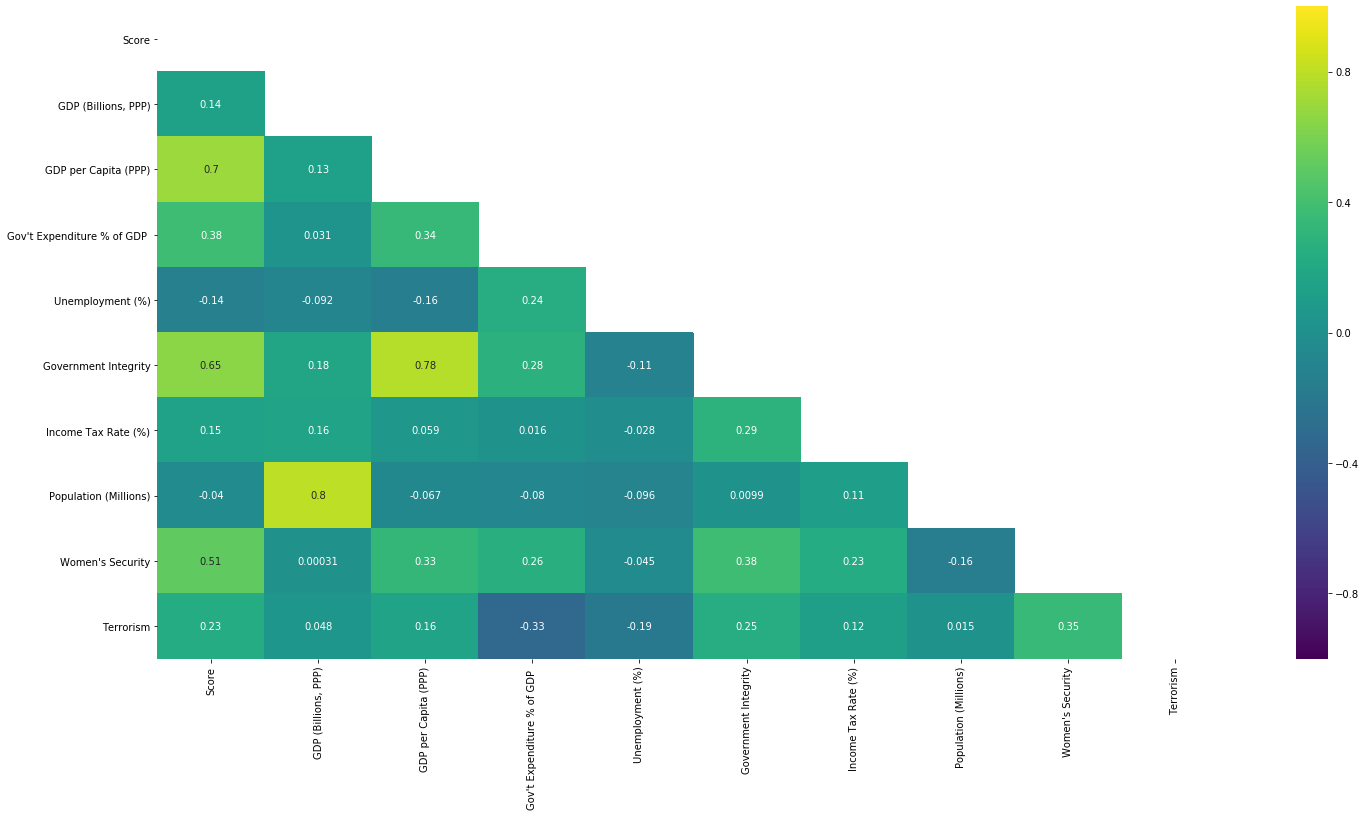

In [24]:
#thanks to seaborn we building the heat map
df_pearson= df_data.corr(method='pearson')

mask = np.zeros_like(df_pearson)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(ncols=1,figsize=(24, 12))
sns.heatmap(df_pearson, mask = mask,  vmin=-1, vmax=1, ax=ax, center=0, cmap="viridis", annot=True)

Nous avons ainsi produit une matrice de corrélation, mais nous n'allons nous intéresser qu'à **la première colonne de la matrice ;

Rappelons que :
- Le coefficient de corrélation est compris entre −1 et 1. 
- Plus le coefficient est proche de 1, plus la relation linéaire positive entre les variables est forte.
- Plus le coefficient est proche de −1 , plus la relation linéaire négative entre les variables est forte.
 
Ainsi, nous remarquons, sans grande surprise que le taux de corrélation le plus important en valeur absolue est celui du GDP per capita. Avec une corrélation à 0,7 

En deuxième position nous retrouvons la variable **Government integrity** avec une corrélation à 0,65

Puis, nous voyons que **Unemployment et Population** présentent un coefficient de corrélation négatif mais très faible. 

Plus généralement, si l’on ne prend pas en compte la variable GDP per capita, nous observons que les variables en rapport avec la liberté sont bien plus corrélées avec le score de bonheur que les variables socio-économiques. 


Afin de vérifier nos affirmations, nous avons décidé de produire ces deux **graphiques à bulles**: 


Nous avons utilisé le module de Seaborn pour créer ce graphique. Les variables utilisées sont le Score de bonheur et le score de l’Intégrité des Gouvernements. Chaque bulle correspond à un pays, les couleurs définissent la région du pays et la taille de la bulle indique sa population.


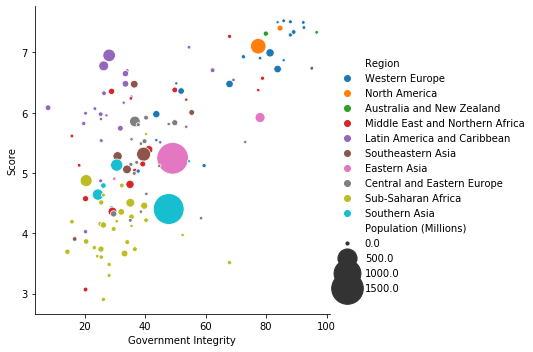

In [18]:
graph2 = sns.relplot(x="Government Integrity",size = 'Population (Millions)',  sizes=(10, 1000), y="Score", hue="Region", data=df_data)

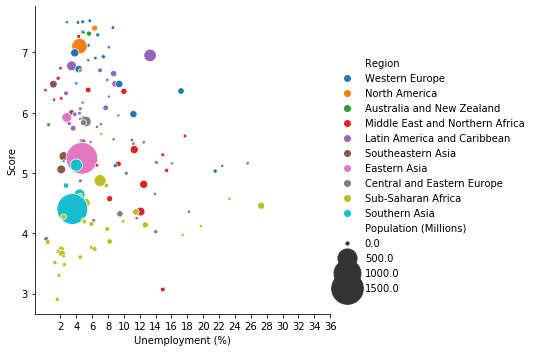

In [15]:
#for further explanation we making sure to display graph related to the heat map. Just to compare we put the populaiton size as the buble size
graph1 = sns.relplot(x="Unemployment (%)", y="Score", size="Population (Millions)", sizes=(10, 1000), hue="Region", data=df_data)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36])
graph1.savefig('carte.png')

**Premier graphique :**
Pour le graphique sur l’intégrité du gouvernement, nous pouvons clairement apercevoir une **tendance** : la pente semble **positive**. Cependant, ce résultat est à prendre avec des pincettes, car nous voyons bien que certaines régions comme l’amérique latine, qui ne considèrent pas leur gouvernement comme intègre, présentent quand même un haut score de bonheur. 

**Deuxième graphique :** 
Pour le graphique sur le chômage, c’est tout à fait le contraire, en effet, **aucune tendance** n’est identifiable, ce qui appuie notre hypothèse de non corrélation. 


**Limites :**
- La notion de corrélation, autrement dit quand deux données semblent liées, est tout à fait différente de celle de causalité, le lien de cause à effet.

- Données manquantes ; certains pays ne sont pas représentés.

- Nos variables ont été choisies arbitrairement (peut être que d’autres variables sont corrélées avec le bonheur).

- Conflit de dates sur les sources de données